Let us first explore an example that falls under novelty detection.  Here, we train a model on data with some distribution and no outliers.  The test data, has some "novel" subset of data that does not follow that distribution.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
import collections

Use the np.random module to generate a normal distribution of 1,000 data points in two dimensions (e.g. x, y) - choose whatever mean and sigma^2 you like.  Generate another 1,000 data points with a normal distribution in two dimensions that are well separated from the first set.  You now have two "clusters".  Concatenate them so you have 2,000 data points in two dimensions.  Plot the points. This will be the training set.

In [19]:
sample1=np.random.standard_normal(size=(1000,2))
sample2=np.random.standard_normal(size=(1000,2))*2+[6,7]
sample=np.concatenate((sample1,sample2),axis=0)

 Plot the points.

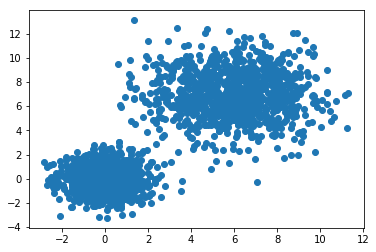

In [20]:
x=sample[:,0]
y=sample[:,1]
plt.scatter(x,y)

Generate 100 data points with the same distribution as your first random normal 2-d set, and 100 data points with the same distribution as your second random normal 2-d set.  This will be the test set labeled X_test_normal.

In [46]:
X_test_normal=np.concatenate((np.random.standard_normal(size=(100,2)),np.random.standard_normal(size=(100,2))*2+[6,7]),axis=0)

Generate 100 data points with a random uniform distribution.  This will be the test set labeled X_test_uniform.

In [25]:
X_test_uniform=16*np.random.rand(100,2)-4.

Define a model classifier with the svm.OneClassSVM

In [26]:
model = svm.OneClassSVM()

Fit the model to the training data.

In [28]:
model.fit(sample)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

Use the trained model to predict whether X_test_normal data point are in the same distributions.  Calculate the fraction of "false" predictions.

In [47]:
pred_normal=model.predict(X_test_normal)
collections.Counter(pred_normal)

Counter({-1.0: 107, 1.0: 93})

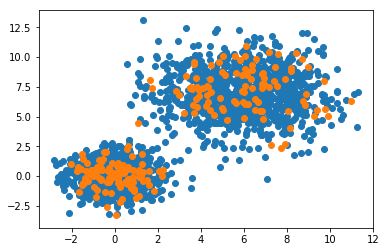

In [48]:
plt.scatter(sample[:,0],sample[:,1])
plt.scatter(X_test_normal[:,0],X_test_normal[:,1])
plt.show()

Use the trained model to predict whether X_test_uniform is in the same distribution. Calculate the fraction of "false" predictions.

In [49]:
pred_uniform=model.predict(X_test_uniform)
collections.Counter(pred_uniform)

Counter({-1.0: 95, 1.0: 5})

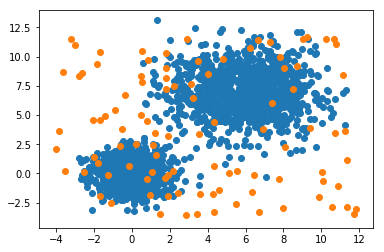

In [50]:
plt.scatter(sample[:,0],sample[:,1])
plt.scatter(X_test_uniform[:,0],X_test_uniform[:,1])
plt.show()

Use the trained model to see how well it recovers the training data.  (Predict on the training data, and calculate the fraction of "false" predictions.)

In [52]:
pred_training=model.predict(sample)
collections.Counter(pred_training)

Counter({-1.0: 1006, 1.0: 994})

Create another instance of the model classifier, but change the kwarg value for nu.  Hint: Use help to figure out what the kwargs are.

In [59]:
modelbetter=svm.OneClassSVM(nu=.1)

Redo the prediction on the training set, prediction on X_test_random, and prediction on X_test.

In [61]:
modelbetter.fit(sample)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [62]:
pred_normal=modelbetter.predict(X_test_normal)
collections.Counter(pred_normal)

Counter({-1.0: 24, 1.0: 176})

In [63]:
pred_uniform=modelbetter.predict(X_test_uniform)
collections.Counter(pred_uniform)

Counter({-1.0: 72, 1.0: 28})

In [65]:
pred_training=modelbetter.predict(sample)
collections.Counter(pred_training)

Counter({-1.0: 268, 1.0: 1732})

Plot in scatter points the X_train in blue, X_test_normal in red, and X_test_uniform in black.  Overplot the trained model decision function boundary for the first instance of the model classifier.

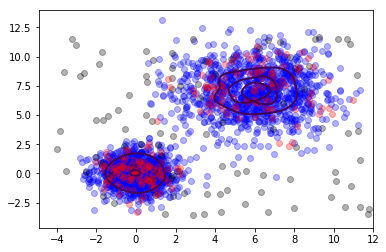

In [73]:
plt.scatter(sample[:,0],sample[:,1],c='b',alpha=.3)
plt.scatter(X_test_uniform[:,0],X_test_uniform[:,1],c='k',alpha=.3)
plt.scatter(X_test_normal[:,0],X_test_normal[:,1],c='r',alpha=.3)
xx1, yy1 = np.meshgrid(np.linspace(-4, 12, 1000), np.linspace(-3,13,1000))
Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0],
           linewidths=2)
plt.show()

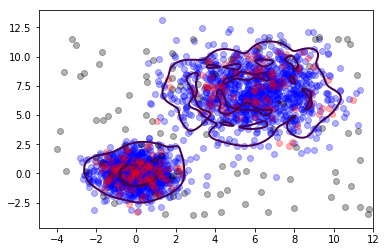

In [72]:
plt.scatter(sample[:,0],sample[:,1],c='b',alpha=.3)
plt.scatter(X_test_uniform[:,0],X_test_uniform[:,1],c='k',alpha=.3)
plt.scatter(X_test_normal[:,0],X_test_normal[:,1],c='r',alpha=.3)
xx1, yy1 = np.meshgrid(np.linspace(-4, 12, 1000), np.linspace(-3,13,1000))
Z1 = modelbetter.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0],
           linewidths=2)
plt.show()

Do the same for the second instance of the model classifier.

In [83]:
from sklearn.covariance import EllipticEnvelope

Test how well EllipticEnvelope predicts the outliers when you concatenate the training data with the X_test_uniform data.

In [86]:
train_contaminated=np.concatenate((sample,X_test_uniform),axis=0)
envelopes=EllipticEnvelope()

In [87]:
envelopes.fit(train_contaminated)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [89]:
pred_train=envelopes.predict(sample)
collections.Counter(pred_train)

Counter({-1: 149, 1: 1851})

In [90]:
pred_normal=envelopes.predict(X_test_normal)
collections.Counter(pred_normal)

Counter({-1: 17, 1: 183})

In [91]:
pred_uniform=envelopes.predict(X_test_uniform)
collections.Counter(pred_uniform)

Counter({-1: 61, 1: 39})

Compute and plot the mahanalobis distances of X_test, X_train_normal, X_train_uniform

In [96]:
np.mean(envelopes.mahalanobis(sample))

1.8716392448550339

In [97]:
np.mean(envelopes.mahalanobis(X_test_normal))

1.8888345952093257

In [98]:
np.mean(envelopes.mahalanobis(X_test_uniform))

8.4654337861268143

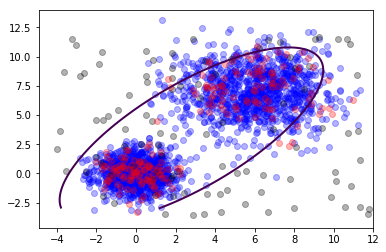

In [99]:
plt.scatter(sample[:,0],sample[:,1],c='b',alpha=.3)
plt.scatter(X_test_uniform[:,0],X_test_uniform[:,1],c='k',alpha=.3)
plt.scatter(X_test_normal[:,0],X_test_normal[:,1],c='r',alpha=.3)
xx1, yy1 = np.meshgrid(np.linspace(-4, 12, 1000), np.linspace(-3,13,1000))
Z1 = envelopes.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour(xx1, yy1, Z1, levels=[0],
           linewidths=2)
plt.show()